In [ ]:
#PRATIKSHA
#172
!pip install keras
!pip install tensorflow

In [ ]:
import numpy
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
numpy.random.seed(7)

In [ ]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))
print(y_train[1])
print(type(y_train[1]))


[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 2, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 2, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 2, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
<class 'list'>
189
0
<class 'numpy.int64'>


In [ ]:
#truncate and/or pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(25000, 500)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [ ]:
import tensorflow as tf
#create the model
embedding_vector_length = 32
model = tf.keras.Sequential()
model.add(Embedding(top_words+1, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model build
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#final evealution of the model
scores=model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 49.71%


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 357s 907ms/step - accuracy: 0.7103 - loss: 0.5328 - val_accuracy: 0.7550 - val_loss: 0.5082
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 432s 1s/step - accuracy: 0.8692 - loss: 0.3174 - val_accuracy: 0.8594 - val_loss: 0.3510
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 390s 902ms/step - accuracy: 0.8951 - loss: 0.2620 - val_accuracy: 0.8361 - val_loss: 0.3696
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 380s 898ms/step - accuracy: 0.9120 - loss: 0.2289 - val_accuracy: 0.8711 - val_loss: 0.3230
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 384s 904ms/step - accuracy: 0.9233 - loss: 0.1965 - val_accuracy: 0.8630 - val_loss: 0.3653
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 374s 883ms/step - accuracy: 0.9309 - loss: 0.1819 - val_accuracy: 0.8453 - val_loss: 0.3630
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 377s 869ms/step - accuracy: 0.9406 - loss: 0.1587 - val_accuracy: 0.8708 - val_loss: 0.3639
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 381s 866ms/step - accuracy: 0.9566 - lo

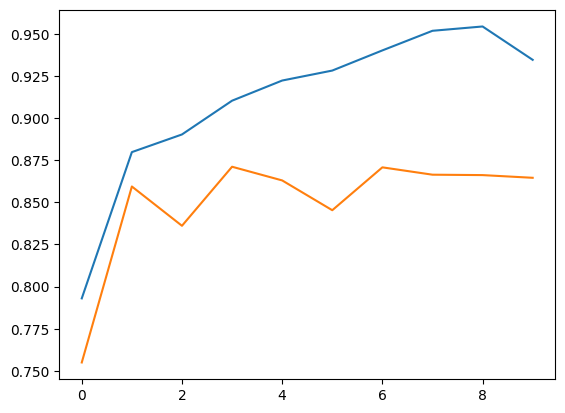

In [ ]:
import matplotlib.pyplot as plt
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)
y1=hist.history['accuracy']
y2=hist.history['val_accuracy']
plt.plot(y1)
plt.plot(y2)

In [ ]:
#hyperparameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Example of tuning LSTM units and dropout
def build_tuned_lstm(units=64, dropout_rate=0.5, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_review_length))
    model.add(LSTM(units, return_sequences=False))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example tuning
tuned_model = build_tuned_lstm(units=128, dropout_rate=0.3, optimizer=Adam(learning_rate=0.001))
history = tuned_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 595s 2s/step - accuracy: 0.7178 - loss: 0.5470 - val_accuracy: 0.8552 - val_loss: 0.3470
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 590s 2s/step - accuracy: 0.8766 - loss: 0.3097 - val_accuracy: 0.8288 - val_loss: 0.3848
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 583s 1s/step - accuracy: 0.8920 - loss: 0.2711 - val_accuracy: 0.8696 - val_loss: 0.3095
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 589s 2s/step - accuracy: 0.8990 - loss: 0.2600 - val_accuracy: 0.8551 - val_loss: 0.3463
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 624s 2s/step - accuracy: 0.9247 - loss: 0.1968 - val_accuracy: 0.8800 - val_loss: 0.3388


In [ ]:
from tensorflow.keras.datasets.imdb import get_word_index

word_index = get_word_index()
index_word = {v: k for k, v in word_index.items()}  # Reverse the word index

# Function to convert sequences back to text
def sequence_to_text(sequence):
    return " ".join([index_word.get(i, "?") for i in sequence if i > 3])  # Ignore indices <= 3 (special tokens)

# Using TextBlob for sentiment analysis
def textblob_sentiment(text):
    analysis = TextBlob(text)
    return 1 if analysis.sentiment.polarity > 0 else 0

# Reconstruct texts from the sequences and apply TextBlob
texts = [sequence_to_text(sequence) for sequence in X_test]  # Reconstruct test set as text
y_textblob = [textblob_sentiment(text) for text in texts]  # Predict sentiments using TextBlob

# Compare TextBlob accuracy
accuracy_textblob = accuracy_score(y_test, y_textblob)
print("Accuracy of TextBlob:", accuracy_textblob)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Accuracy of TextBlob: 0.4746
